# Decomposing Time Series

In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
miles_decomp_df = pd.read_csv("us-airlines-monthly-aircraft-miles-flown.csv",header = 0,parse_dates= [0])

In [3]:
miles_decomp_df

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462
...,...,...
91,1970-08-01,14057
92,1970-09-01,16234
93,1970-10-01,12389
94,1970-11-01,11595


In [4]:
miles_decomp_df.index = miles_decomp_df['Month']

In [5]:
miles_decomp_df

,Month,MilesMM
Month,,
1963-01-01,1963-01-01,6827
1963-02-01,1963-02-01,6178
1963-03-01,1963-03-01,7084
1963-04-01,1963-04-01,8162
1963-05-01,1963-05-01,8462
...,...,...
1970-08-01,1970-08-01,14057
1970-09-01,1970-09-01,16234
1970-10-01,1970-10-01,12389


In [6]:
result = seasonal_decompose(miles_decomp_df['MilesMM'],model = 'additive') 

In [7]:
result

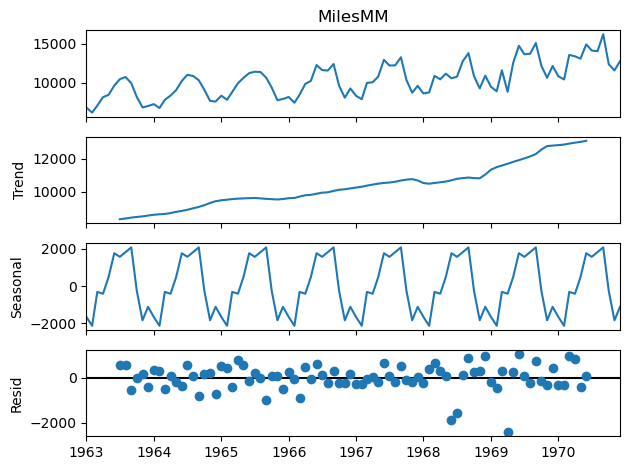

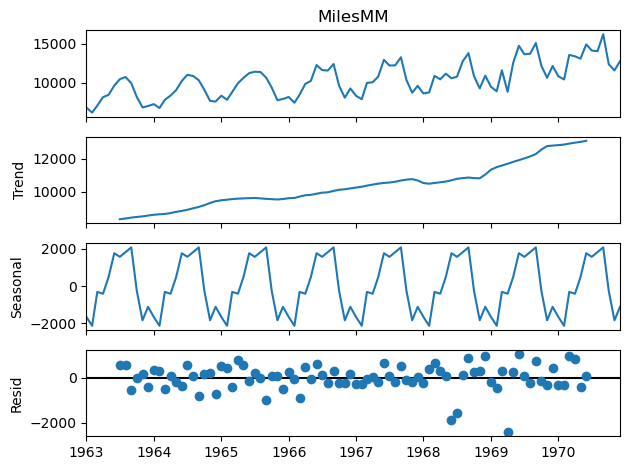

In [8]:
result.plot()

In [9]:
result2 = seasonal_decompose(miles_decomp_df['MilesMM'],model = 'multiplicative')

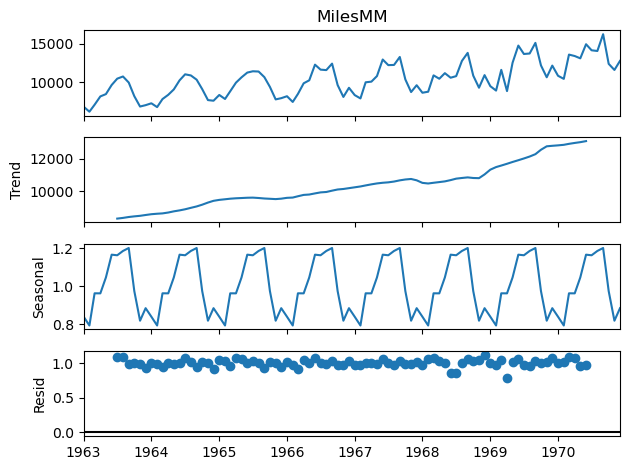

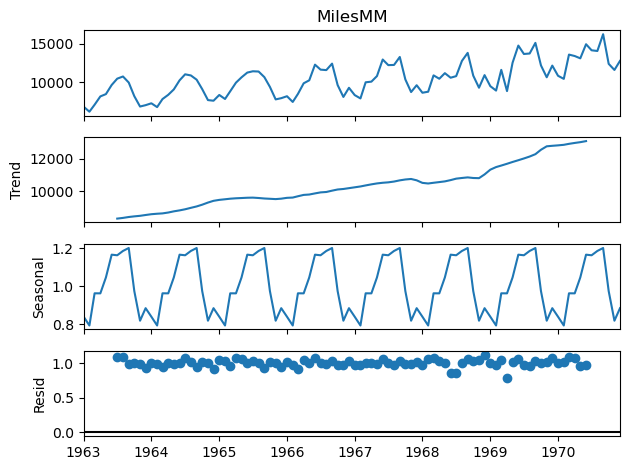

In [10]:
result2.plot()

# Differencing

In [11]:
miles_df = pd.read_csv("us-airlines-monthly-aircraft-miles-flown.csv",header = 0,parse_dates= [0])

In [12]:
miles_df

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462
...,...,...
91,1970-08-01,14057
92,1970-09-01,16234
93,1970-10-01,12389
94,1970-11-01,11595


In [13]:
miles_df['lag1'] = miles_df['MilesMM'].shift(1)

In [14]:
miles_df['MilesMM_diff_1'] = miles_df['MilesMM'].diff(periods = 1)

In [16]:
miles_df.head()

,Month,MilesMM,lag1,MilesMM_diff_1
0,1963-01-01,6827,NaN,NaN
1,1963-02-01,6178,6827.0,-649.0
2,1963-03-01,7084,6178.0,906.0
3,1963-04-01,8162,7084.0,1078.0
4,1963-05-01,8462,8162.0,300.0


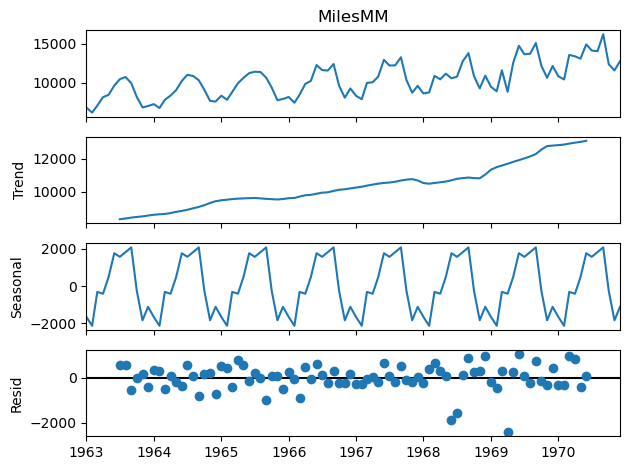

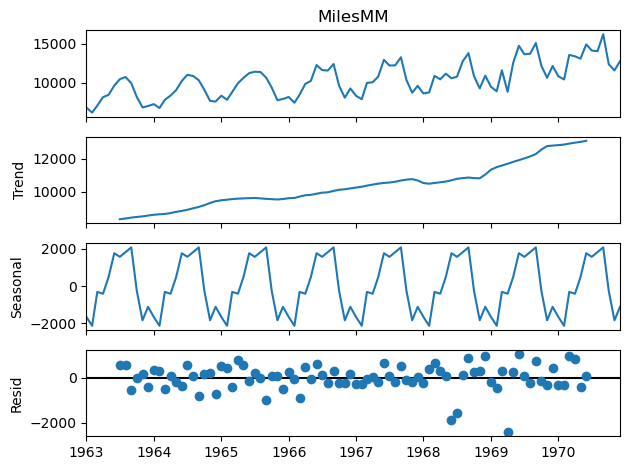

In [17]:
miles_df.index = miles_df['Month']
result_a = seasonal_decompose(miles_df['MilesMM'],model = 'additive')
result_a.plot()

In [15]:
# it's return object
# show object nahi hain 

miles_df.index = miles_df['Month']
result = seasonal_decompose(miles_df['MilesMM'],model = 'additive')

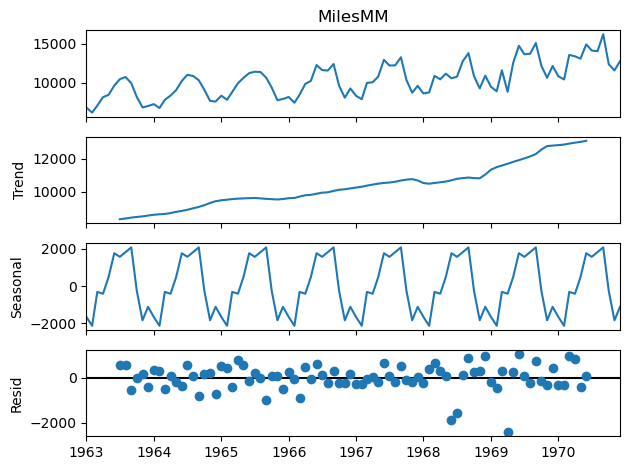

In [31]:
miles_df.index = miles_df['Month']
result_a = seasonal_decompose(miles_df['MilesMM'],model = 'additive')
result_a.plot()
plt.show()

# 04/03/25

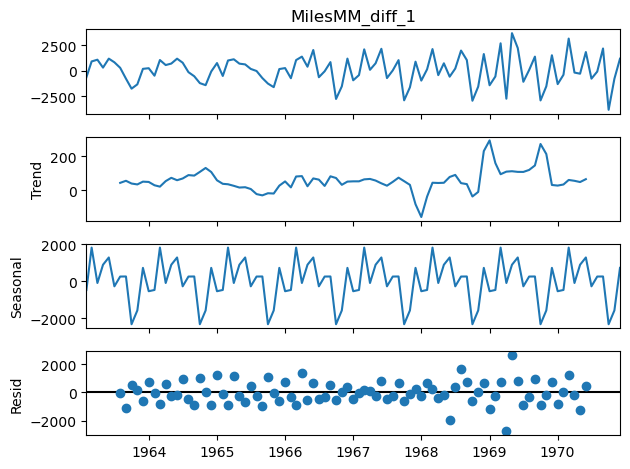

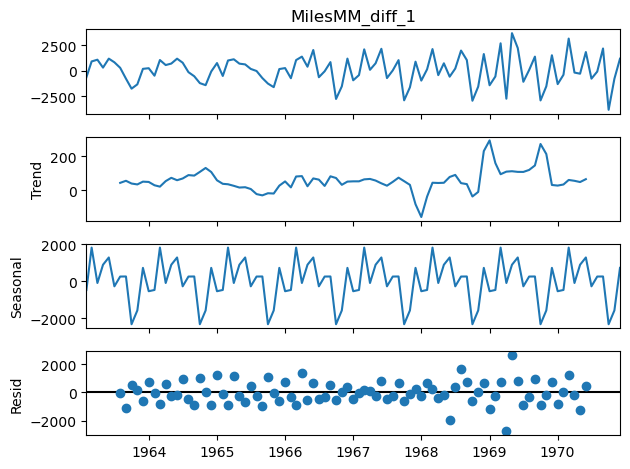

In [32]:
miles_df.index = miles_df['Month']
result_b = seasonal_decompose(miles_df.iloc[1:,3],model = 'additive')
result_b.plot()

<Axes: xlabel='Month'>

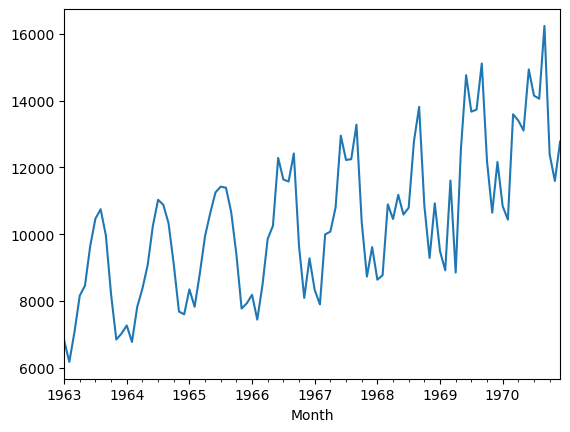

In [33]:
miles_df['MilesMM'].plot()

In [34]:
miles_df['MilesMM_diff_12'] = miles_df['MilesMM_diff_1'].diff(periods = 12)

<Axes: xlabel='Month'>

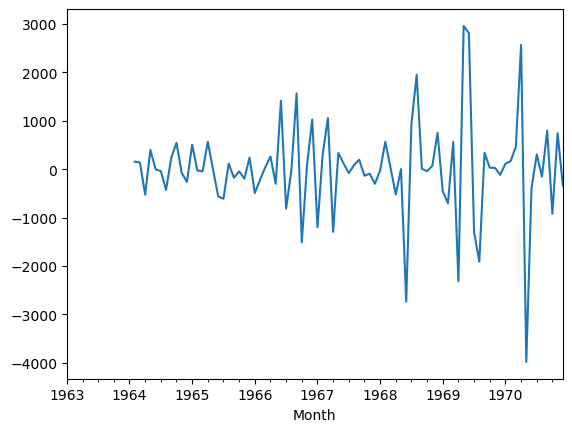

In [35]:
miles_df['MilesMM_diff_12'].plot()

In [36]:
# why do we remove trend and seasonality
# when to use additive and multiplicative
# why do we use additive and multiplicative

In [37]:
result_c = seasonal_decompose(miles_df.iloc[13:,4],model = 'additive')

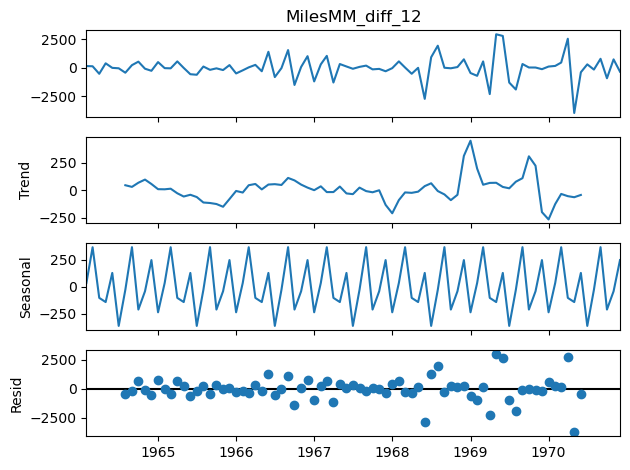

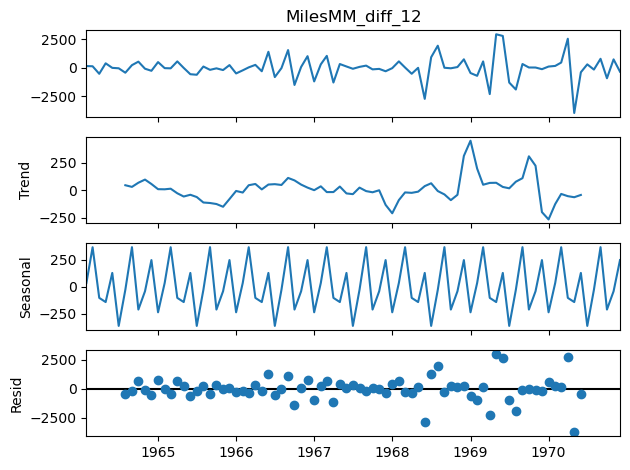

In [38]:
result_c.plot()

In [39]:
miles_df['MilesMM_diff_12'].head(15)

Month
1963-01-01      NaN
1963-02-01      NaN
1963-03-01      NaN
1963-04-01      NaN
1963-05-01      NaN
1963-06-01      NaN
1963-07-01      NaN
1963-08-01      NaN
1963-09-01      NaN
1963-10-01      NaN
1963-11-01      NaN
1963-12-01      NaN
1964-01-01      NaN
1964-02-01    155.0
1964-03-01    138.0
Name: MilesMM_diff_12, dtype: float64

In [40]:
# statsnary is additive
# statsnary is multilicative

In [41]:
# why do we not use train test split of machine laerning algorithm

# 10/Mar/25

# Train Test Split

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
temp_df = pd.read_csv("daily-min-temperatures.xls",header = 0,parse_dates = [0])

In [45]:
temp_df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [46]:
temp_df.tail()

,Date,Temp
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7
3649,1990-12-31,13.0


In [47]:
temp_df.shape

(3650, 2)

In [48]:
temp_df.shape[0]

3650

In [50]:
train_size = int(temp_df.shape[0]*0.8)
train_size

2920